## Packages

In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import rcParams

%matplotlib inline

## Import data 

In [290]:
data = pd.read_csv(r'C:\Users\User\Google Drive\Notes for Data analyst\Portfolio Projects\Datacamp data analyst assessment\travel_insurance.csv')

## Data Cleaning + preprocessing

In [291]:
# Changing data type of ChronicDiseases and TravelInsurance to category
data['ChronicDiseases'] = data['ChronicDiseases'].astype('category')
data['TravelInsurance'] = data['TravelInsurance'].astype('int')

## Exploratory Data Analysis

In [292]:
data.describe()

,Age,AnnualIncome,FamilyMembers,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.357323
std,2.913308,3.768557e+05,1.609650,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1987 non-null   int64   
 1   Employment Type      1987 non-null   object  
 2   GraduateOrNot        1987 non-null   object  
 3   AnnualIncome         1987 non-null   int64   
 4   FamilyMembers        1987 non-null   int64   
 5   ChronicDiseases      1987 non-null   category
 6   FrequentFlyer        1987 non-null   object  
 7   EverTravelledAbroad  1987 non-null   object  
 8   TravelInsurance      1987 non-null   int32   
dtypes: category(1), int32(1), int64(3), object(4)
memory usage: 118.6+ KB


Text(0.5, 1.0, 'Distribtion of NaN values')

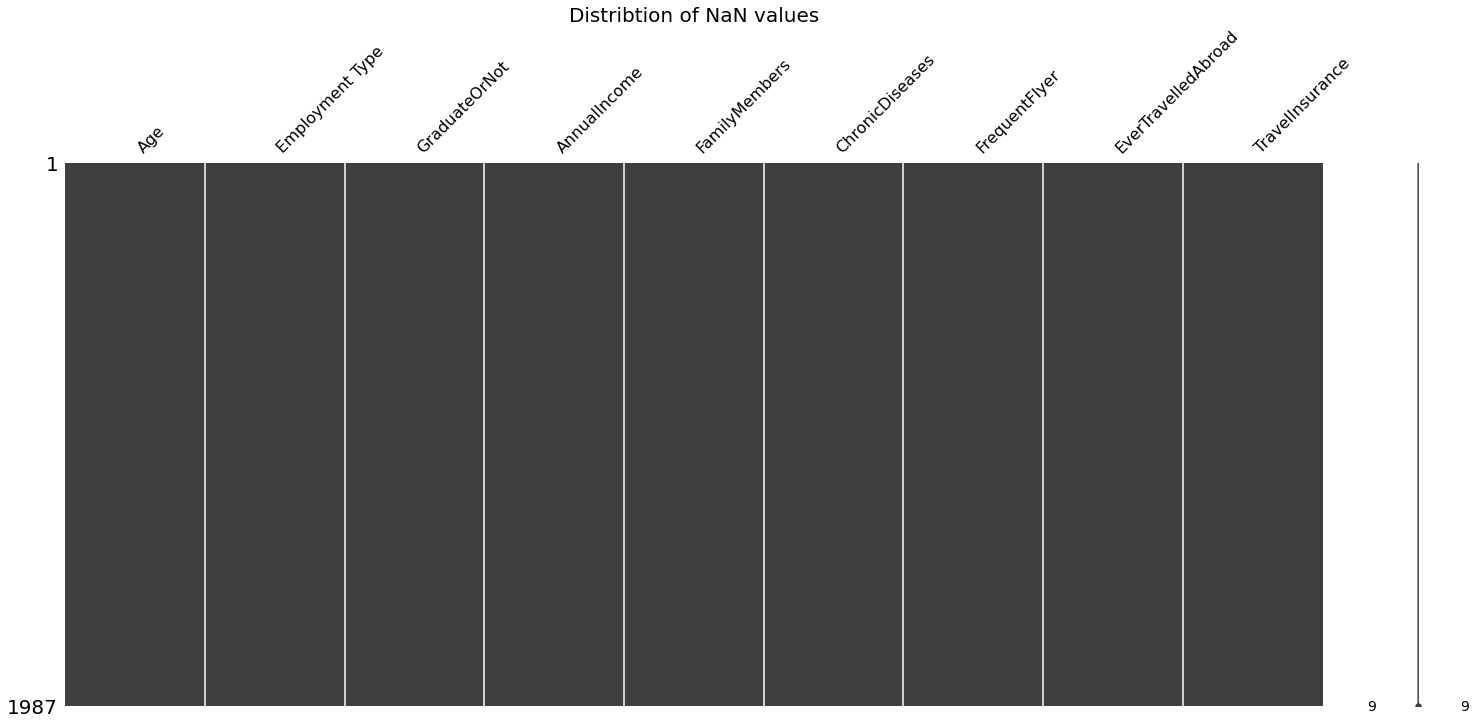

In [294]:
# Checking for null values
msno.matrix(data)
plt.title('Distribtion of NaN values', fontsize=20)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Customer Age')

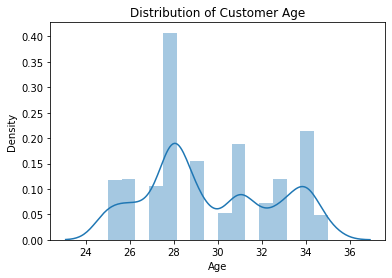

In [295]:
sns.distplot(data['Age'])
plt.title('Distribution of Customer Age')

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Customer Annual Income')

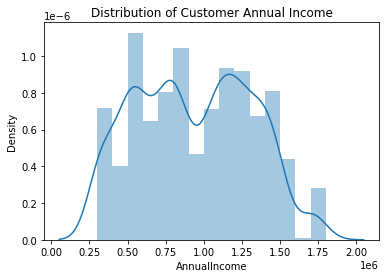

In [296]:
sns.distplot(data['AnnualIncome'])
plt.title('Distribution of Customer Annual Income')

Text(0.5, 1.0, 'Distribution of Employment Type')

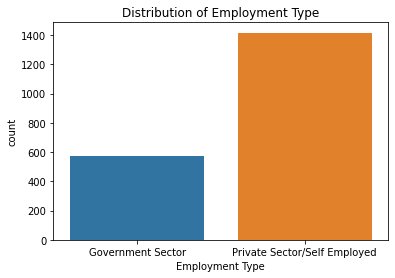

In [297]:
sns.countplot(data= data, x='Employment Type' )
plt.title('Distribution of Employment Type')

Text(0.5, 1.0, 'Distribution of Customer who are Graduates')

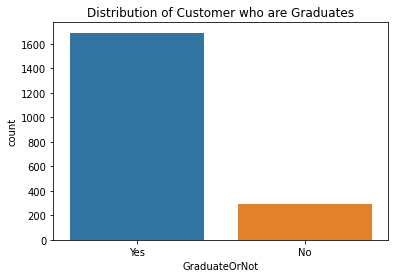

In [298]:
sns.countplot(data= data, x='GraduateOrNot')
plt.title('Distribution of Customer who are Graduates')

Text(0.5, 1.0, 'Distribution of Customers who have Chronic Diseases')

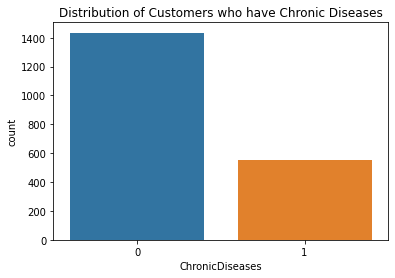

In [299]:
sns.countplot(data= data, x='ChronicDiseases')
plt.title('Distribution of Customers who have Chronic Diseases')

Text(0.5, 1.0, 'Distribution of Customers who are Frequent Flyer')

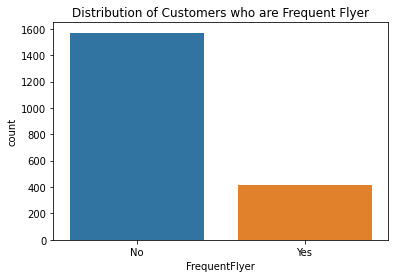

In [300]:
sns.countplot(data= data, x='FrequentFlyer')
plt.title('Distribution of Customers who are Frequent Flyer')

Text(0.5, 1.0, 'Distribution of Customers who travel abroad before')

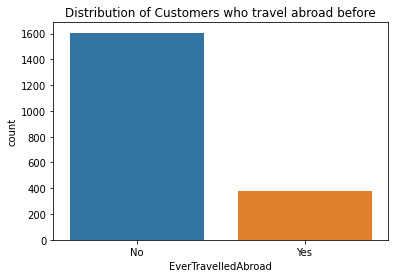

In [301]:
sns.countplot(data= data, x='EverTravelledAbroad')
plt.title('Distribution of Customers who travel abroad before')

Text(0.5, 1.0, 'Distribution of Customers who bought Travel Insurance')

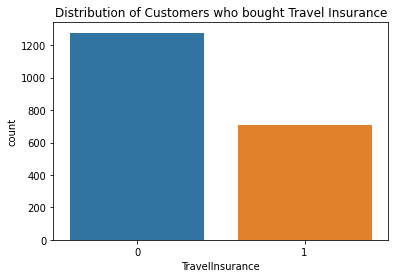

In [302]:
sns.countplot(data= data, x='TravelInsurance')
plt.title('Distribution of Customers who bought Travel Insurance')

## Insights drawn

Travel Assured customers base is mainly made up of people in the age range of 25 -35 years old.<br>
The majority of them work in private sector<br>
and they are university graduates.<br>
They do not have chronic diseases,<br>
have not travelled abroad,<br>
are not frequent flyer<br>
and have not bought travel insurance<br>


# Where to target advertising
Assessment Question:They want to know if there are differences in
the travel habits between customers and non-customers - they believe they are
more likely to travel often (buying tickets from frequent flyer miles) and travel
abroad.

In [303]:
print(data.groupby(by=['TravelInsurance', 'EverTravelledAbroad','FrequentFlyer'])['Age'].count())

TravelInsurance  EverTravelledAbroad  FrequentFlyer
0                No                   No               1037
                                      Yes               158
                 Yes                  No                 62
                                      Yes                20
1                No                   No                321
                                      Yes                91
                 Yes                  No                150
                                      Yes               148
Name: Age, dtype: int64


In [304]:
print(data.groupby(by=['EverTravelledAbroad', 'FrequentFlyer'])['TravelInsurance'].mean())

EverTravelledAbroad  FrequentFlyer
No                   No               0.236377
                     Yes              0.365462
Yes                  No               0.707547
                     Yes              0.880952
Name: TravelInsurance, dtype: float64


Text(0.5, 1.0, 'Probability of buying Travel Insurance for \n customers who are frequent flyer and travels abroad')

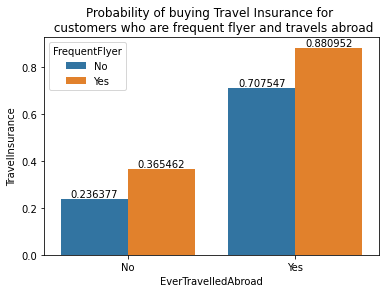

In [305]:
# Plot for 'Probability of buying Travel Insurance for \n customers who are frequent flyer and travels abroad'
ax =sns.barplot(data = data, hue ='FrequentFlyer', y='TravelInsurance', x='EverTravelledAbroad', ci = False )
for container in ax.containers:
    ax.bar_label(container)
plt.title('Probability of buying Travel Insurance for \n customers who are frequent flyer and travels abroad')

Our customers are more likely to travel abroad before and also they are more likely to be frequent flyers. This can be seen from the graph where 88% customers who travel abroad before and are frequent flyer will buy our travel insurance, as compared to only 24% of our customers who are non-frequent flyer and have not travelled before buying our insurance.

This insight also make it most likely that our advertising team should be targeting customers who are frequent flyer and travel abroad before.


# Finding out the right people to advertise

Using logistic regression find out significance of each variable and use that to find out the important variables that the marketing team should focus on

In [306]:
df_ml = data

In [307]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1987 non-null   int64   
 1   Employment Type      1987 non-null   object  
 2   GraduateOrNot        1987 non-null   object  
 3   AnnualIncome         1987 non-null   int64   
 4   FamilyMembers        1987 non-null   int64   
 5   ChronicDiseases      1987 non-null   category
 6   FrequentFlyer        1987 non-null   object  
 7   EverTravelledAbroad  1987 non-null   object  
 8   TravelInsurance      1987 non-null   int32   
dtypes: category(1), int32(1), int64(3), object(4)
memory usage: 118.6+ KB


In [308]:
df_ml['TravelInsurance'] = df_ml['TravelInsurance'].astype('category')

In [309]:
# One hot encode categorical variables
categories= ['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad' ]
df_ml = pd.get_dummies(df_ml, columns=categories , drop_first=True)

In [310]:
# Set up X and y variables
X = df_ml.drop(labels = 'TravelInsurance', axis=1)
y = df_ml['TravelInsurance']

In [311]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777, test_size=0.2)

In [312]:
from statsmodels.tools import add_constant
X_train_= add_constant(X_train)
logreg = sm.Logit(y_train, X_train).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.534143
         Iterations 5


In [313]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:        TravelInsurance   No. Observations:                 1589
Model:                          Logit   Df Residuals:                     1581
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Mar 2022   Pseudo R-squ.:                  0.1774
Time:                        14:40:42   Log-Likelihood:                -848.75
converged:                       True   LL-Null:                       -1031.8
Covariance Type:            nonrobust   LLR p-value:                 4.574e-75
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Age                                             -0.0745      0.009     -8.363      0.000      -0.092      -0.057
AnnualIncome                 

In [314]:
# Extract coef
coef = logreg.params
odds_ratio = np.exp(coef)
print(odds_ratio)
print(coef)

Age                                             0.928162
AnnualIncome                                    1.000001
FamilyMembers                                   1.086859
ChronicDiseases                                 1.054576
Employment Type_Private Sector/Self Employed    0.962656
GraduateOrNot_Yes                               0.609617
FrequentFlyer_Yes                               1.400502
EverTravelledAbroad_Yes                         6.216850
dtype: float64
Age                                            -0.074549
AnnualIncome                                    0.000001
FamilyMembers                                   0.083292
ChronicDiseases                                 0.053139
Employment Type_Private Sector/Self Employed   -0.038059
GraduateOrNot_Yes                              -0.494924
FrequentFlyer_Yes                               0.336831
EverTravelledAbroad_Yes                         1.827263
dtype: float64


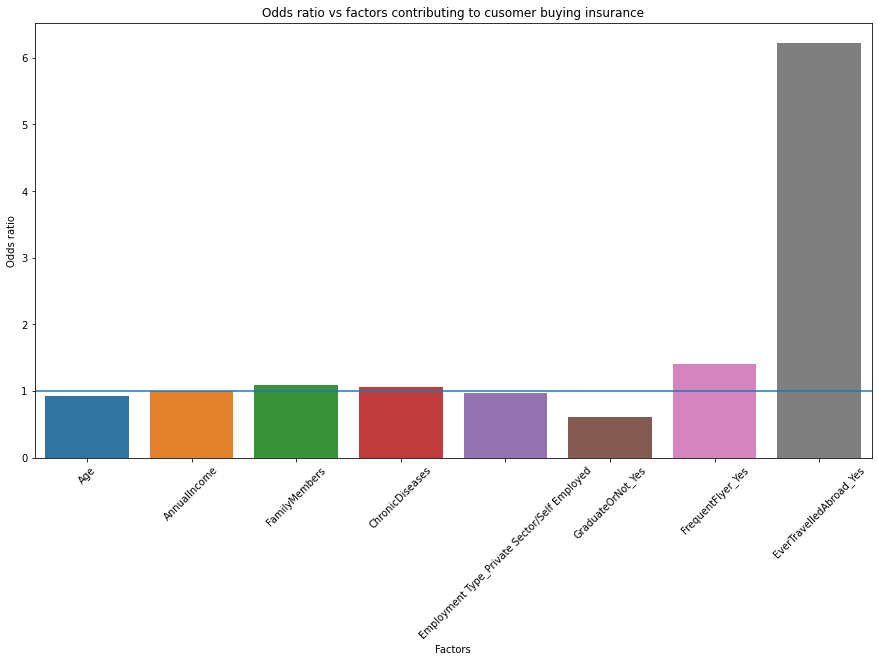

<Figure size 432x288 with 0 Axes>

In [315]:
odds_ratio_df = odds_ratio.reset_index()
odds_ratio_df
odds_ratio_df.columns = ['Factors', 'Odds ratio']

plt.figure(figsize = (15,8))
graph = sns.barplot(data = odds_ratio_df, y ='Odds ratio', x = 'Factors')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
graph.axhline(1)
plt.title('Odds ratio vs factors contributing to cusomer buying insurance')

plt.show()
plt.savefig('save_as_a_png.png')

From summary table, we can see that Age, Annual Income, FamilyMembers, GraduateOrNot, FrequentFlyer and EverTravelledAbroad are the most significant variables to determine whether a customer will buy our travel insurance. In addition, from the signs of coef in these variables we can decide the relationship between a variable and the outcome of a customer buying our Travel insurance.<br>
Therefore marketing efforts should be targeted at people with a younger age that has high annual income. They should preferably have more family members and are not graduates. They should also be frequent flyers that have travel abroad before.

## Checking accuracy of model

In [316]:
y_pred = logreg.predict(X_test)
y_pred =round(y_pred)

In [317]:
# test accuracy
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, normalize='all'))
print(classification_report(y_test, y_pred))

[[232  17]
 [ 86  63]]
[[0.58291457 0.04271357]
 [0.2160804  0.15829146]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       249
           1       0.79      0.42      0.55       149

    accuracy                           0.74       398
   macro avg       0.76      0.68      0.68       398
weighted avg       0.75      0.74      0.72       398

